coordinate aliasing? (branch: coordinate_aliasing)

In [1]:
import yt
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2022-10-18 11:37:02,871 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-10-18 11:37:02,949 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-10-18 11:37:02,950 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-10-18 11:37:02,951 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-10-18 11:37:02,951 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-10-18 11:37:02,952 Parameters: cosmological_simulation   = 0


In [2]:
ds.coordinates.add_coordinate_alias("myprefferedx", "x")
ds.coordinates.add_coordinate_alias("zzzzzzzzzz", "z")

In [3]:
ds.coordinates.image_axis_name[1]

('zzzzzzzzzz', 'myprefferedx')

Parsing Hierarchy : 100%|███████████████████| 173/173 [00:00<00:00, 8394.62it/s]
yt : [INFO     ] 2022-10-18 11:34:47,008 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2022-10-18 11:34:48,440 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:48,440 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:48,441 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:48,441 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:48,444 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



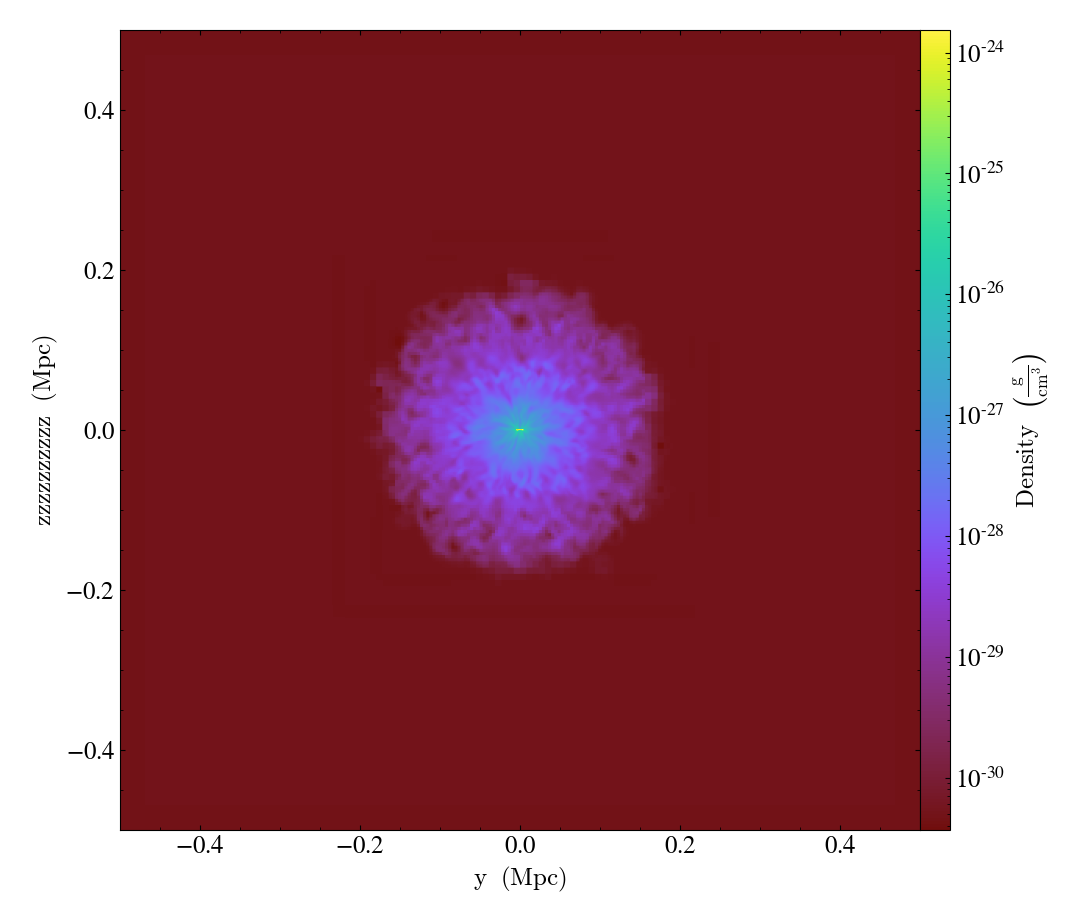

In [4]:
yt.SlicePlot(ds, "myprefferedx", ("gas", "density"))

yt : [INFO     ] 2022-10-18 11:34:49,795 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:49,797 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:49,797 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:49,798 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:49,799 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



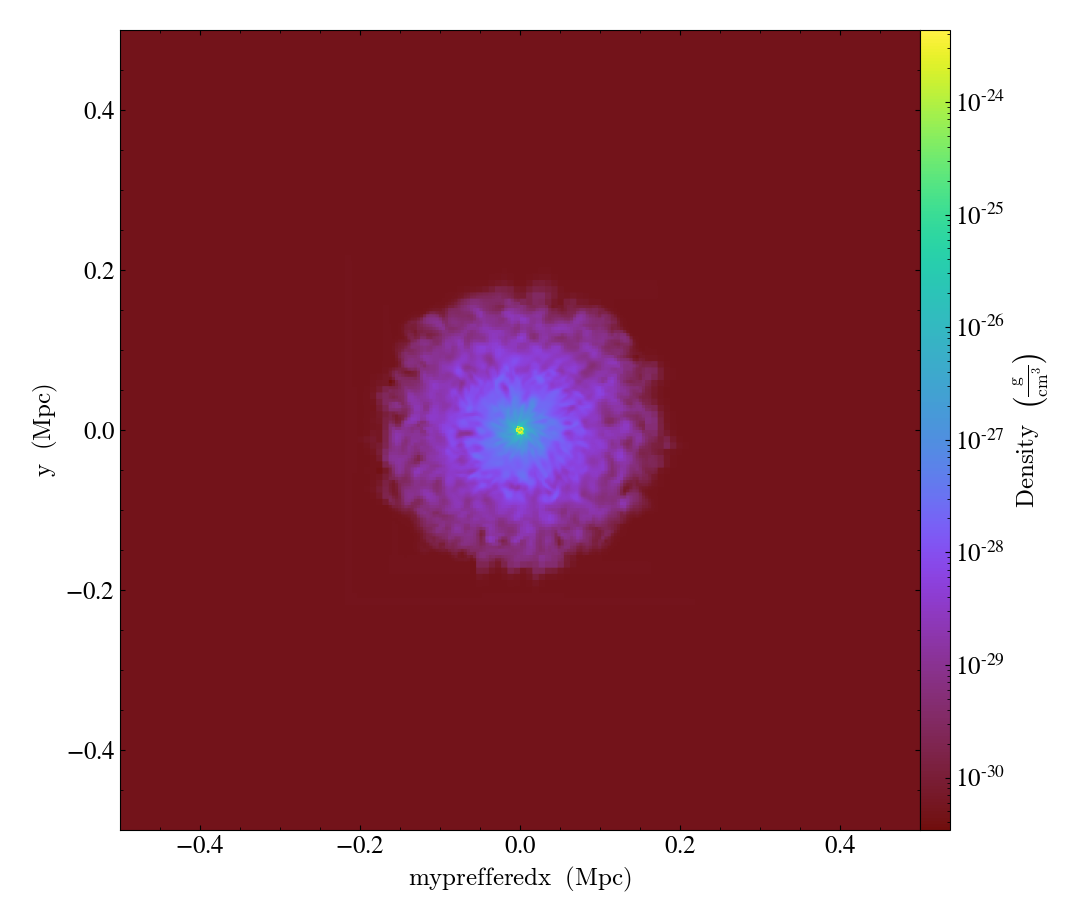

In [5]:
yt.SlicePlot(ds, "z", ("gas", "density"))

yt : [INFO     ] 2022-10-18 11:34:50,328 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:50,329 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:50,329 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:50,330 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:50,332 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



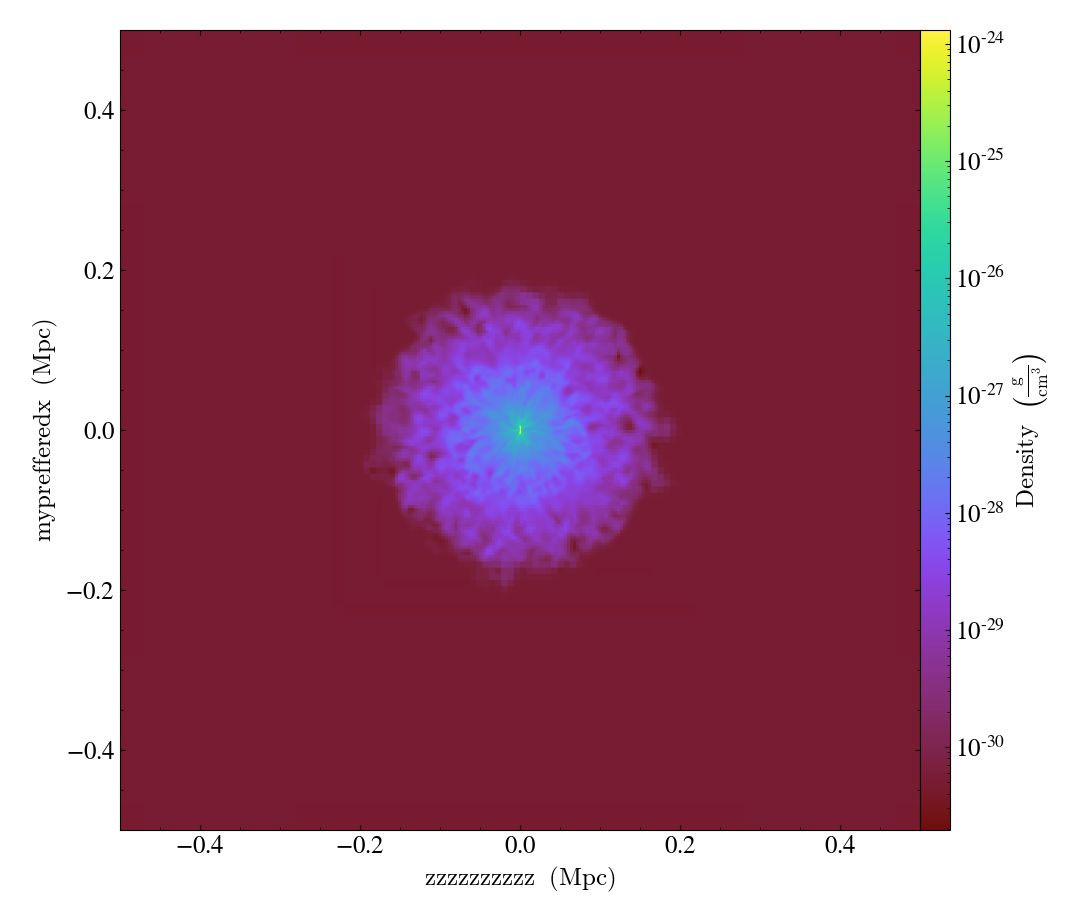

In [6]:
yt.SlicePlot(ds, 1, ("gas", "density"))

yt : [INFO     ] 2022-10-18 11:34:51,025 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,025 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,027 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,027 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,030 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



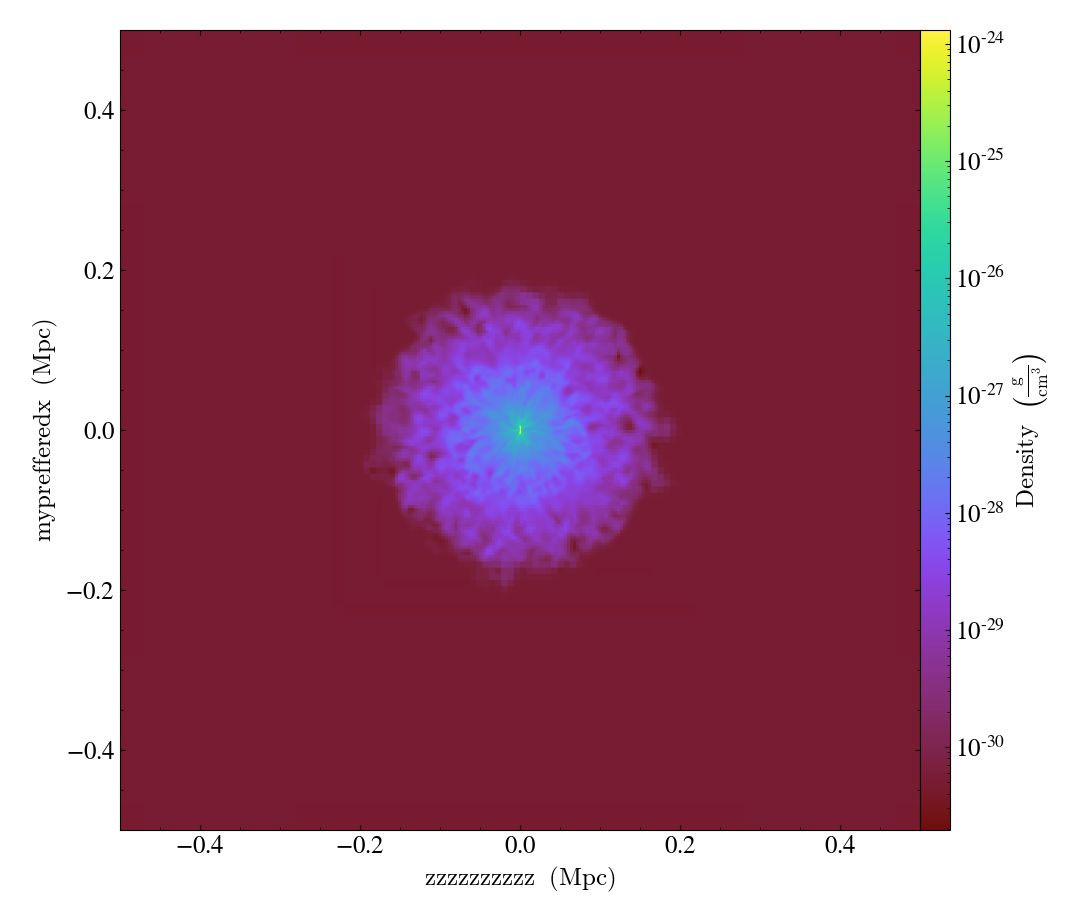

In [7]:
yt.SlicePlot(ds, "y", ("gas", "density"))

yt : [INFO     ] 2022-10-18 11:34:51,675 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,675 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,676 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,676 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-18 11:34:51,678 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



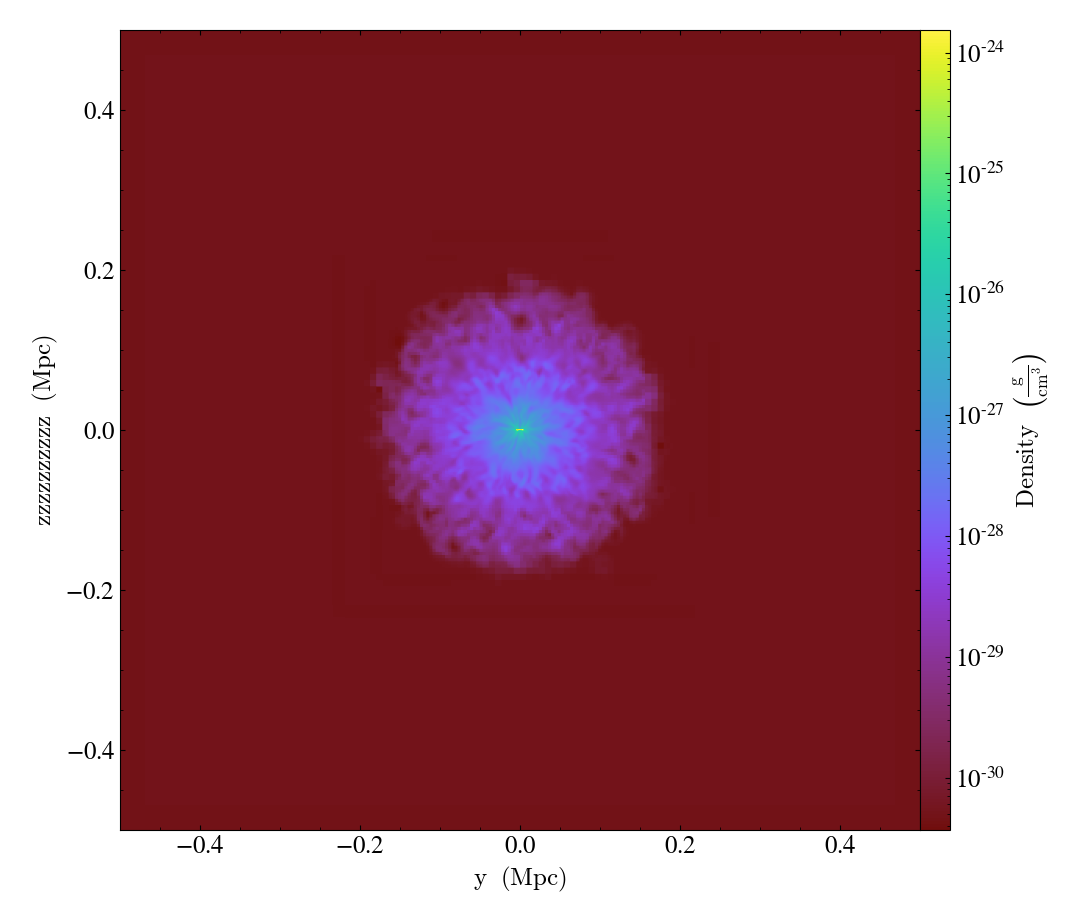

In [8]:
yt.SlicePlot(ds, (1,0,0), ("gas", "density"))

yt : [INFO     ] 2022-10-18 11:34:54,012 xlim = -0.500000 0.500000
yt : [INFO     ] 2022-10-18 11:34:54,013 ylim = -0.500000 0.500000
yt : [INFO     ] 2022-10-18 11:34:54,014 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



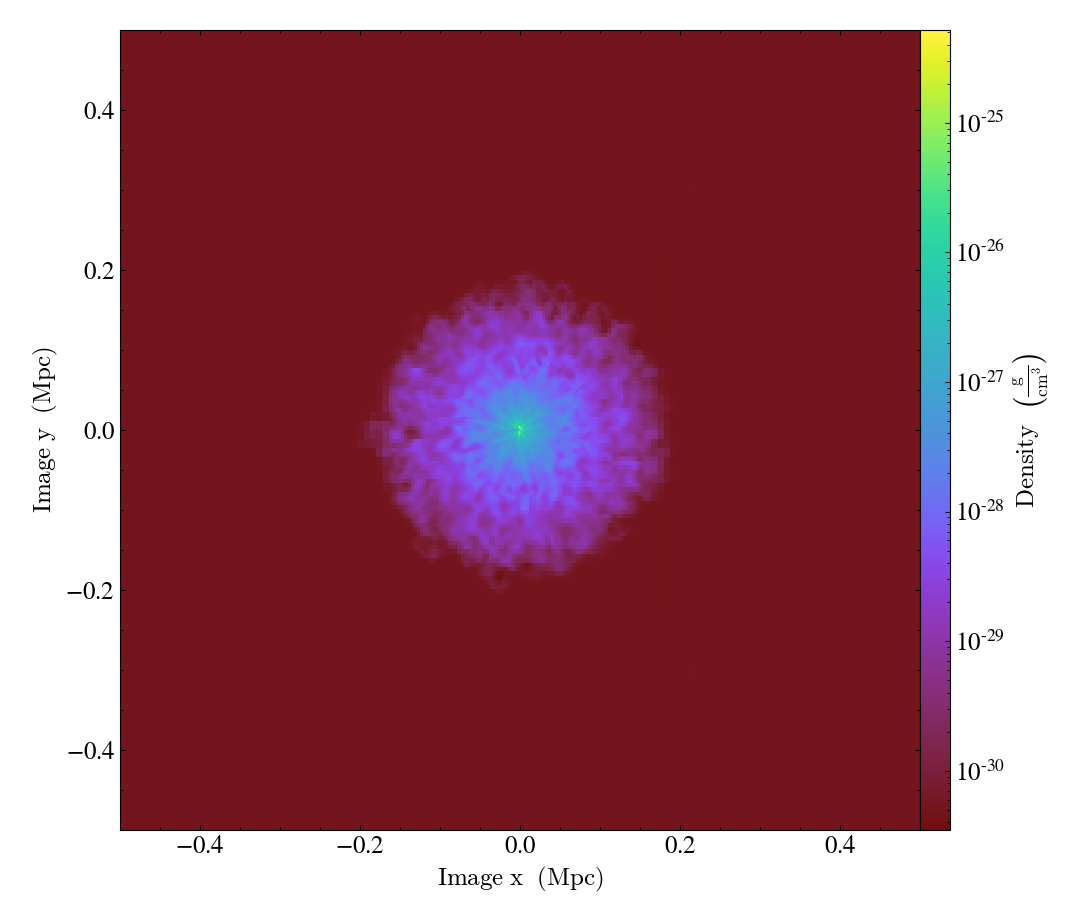

In [9]:
yt.SlicePlot(ds, (1,1,0), ("gas", "density"))

In [9]:
p = ds.proj(("gas", "density"), "myprefferedx")
p[('index', 'ones')].sum()

unyt_quantity(1.26893234e+29, 'cm')

In [8]:
p = ds.proj(("gas", "density"), "x")
p[('index', 'ones')].sum()

unyt_quantity(1.26893234e+29, 'cm')

In [42]:
from collections import UserDict
from typing import Optional 
class DictWithAliases(UserDict):
    # returns only, cannot set by alias
    
    _key_aliases: Optional[dict] = None
    
    @property
    def key_aliases(self):
        if self._key_aliases is None:
            self._key_aliases = {}
        return self._key_aliases
    
    def add_alias(self, key, alias):        
        self.key_aliases[alias] = key
        
    def __getitem__(self, key):
        keytouse = self.key_aliases.get(key, key)
        return super().__getitem__(keytouse)
    
    def get(self, key, default=None):
        keytouse = self.key_aliases.get(key, key)
        return super().get(keytouse, default=default)
        
            

In [43]:
d = DictWithAliases()

In [44]:
d['a'] = 1

In [45]:
d['a']

1

In [46]:
d.add_alias('a', 'blah')

In [47]:
d['blah']

1

In [49]:
import xarray as xr
ds = xr.open_dataset('/home/chavlin/hdd/data/yt_data/yt_sample_sets/cmip6/co23D_Emon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc')

In [50]:
ds = xr.open_dataset('/home/chavlin/hdd/data/yt_data/yt_sample_sets/cmip6/co23D_Emon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc')

In [51]:
ds

<xarray.Dataset>
Dimensions:    (time: 612, bnds: 2, lev: 40, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lev        (lev) float64 0.95 0.93 0.91 0.89 0.87 ... 0.23 0.21 0.19 0.17
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lev_bnds   (lev, bnds) float64 ...
    p0         float64 ...
    a          (lev) float64 ...
    b          (lev) float64 ...
    ps         (time, lat, lon) float32 ...
    a_bnds     (lev, bnds) float64 ...
    b_bnds     (lev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    co23D      (time, lev, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/e861f26a-bfcd-42da-ad85-47a4e7518087
    variable_id:            co23D
    variant_label:          r101i1p1f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

In [57]:
ds.bnds

<xarray.DataArray 'bnds' (bnds: 2)>
array([0, 1])
Dimensions without coordinates: bnds

In [58]:
ds.co23D

<xarray.DataArray 'co23D' (time: 612, lev: 40, lat: 90, lon: 144)>
[317260800 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lev      (lev) float64 0.95 0.93 0.91 0.89 0.87 ... 0.25 0.23 0.21 0.19 0.17
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  CO2_3D_tracer
    long_name:      3D field of transported CO2
    comment:        report 3D field of model simulated atmospheric CO2 mass m...
    units:          kg kg-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-08-05T20:20:03Z altered by CMOR: replaced missing va...

In [59]:
ds.lev_bnds

<xarray.DataArray 'lev_bnds' (lev: 40, bnds: 2)>
array([[0.96, 0.94],
       [0.94, 0.92],
       [0.92, 0.9 ],
       [0.9 , 0.88],
       [0.88, 0.86],
       [0.86, 0.84],
       [0.84, 0.82],
       [0.82, 0.8 ],
       [0.8 , 0.78],
       [0.78, 0.76],
       [0.76, 0.74],
       [0.74, 0.72],
       [0.72, 0.7 ],
       [0.7 , 0.68],
       [0.68, 0.66],
       [0.66, 0.64],
       [0.64, 0.62],
       [0.62, 0.6 ],
       [0.6 , 0.58],
       [0.58, 0.56],
       [0.56, 0.54],
       [0.54, 0.52],
       [0.52, 0.5 ],
       [0.5 , 0.48],
       [0.48, 0.46],
       [0.46, 0.44],
       [0.44, 0.42],
       [0.42, 0.4 ],
       [0.4 , 0.38],
       [0.38, 0.36],
       [0.36, 0.34],
       [0.34, 0.32],
       [0.32, 0.3 ],
       [0.3 , 0.28],
       [0.28, 0.26],
       [0.26, 0.24],
       [0.24, 0.22],
       [0.22, 0.2 ],
       [0.2 , 0.18],
       [0.18, 0.16]])
Coordinates:
  * lev      (lev) float64 0.95 0.93 0.91 0.89 0.87 ... 0.25 0.23 0.21 0.19 0.17
Dimensions without coordinates: bnds
Attributes:
    formula:        p = a*p0 + b*ps
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    units:          1
    formula_terms:  p0: p0 a: a_bnds b: b_bnds ps: ps

In [61]:
ds.ps

<xarray.DataArray 'ps' (time: 612, lat: 90, lon: 144)>
array([[[ 69362.914,  69362.914, ...,  69362.914,  69362.914],
        [ 71794.94 ,  71599.82 , ...,  72081.98 ,  71924.22 ],
        ...,
        [101512.41 , 101516.29 , ..., 101501.42 , 101509.73 ],
        [101443.21 , 101443.21 , ..., 101443.21 , 101443.21 ]],

       [[ 68304.74 ,  68304.74 , ...,  68304.74 ,  68304.74 ],
        [ 70687.414,  70483.05 , ...,  70997.45 ,  70838.52 ],
        ...,
        [102216.59 , 102216.12 , ..., 102212.125, 102216.25 ],
        [102299.375, 102299.375, ..., 102299.375, 102299.375]],

       ...,

       [[ 68571.59 ,  68571.59 , ...,  68571.59 ,  68571.59 ],
        [ 71036.664,  70831.914, ...,  71340.445,  71182.52 ],
        ...,
        [100070.836, 100072.35 , ..., 100071.195, 100072.12 ],
        [100352.27 , 100352.27 , ..., 100352.27 , 100352.27 ]],

       [[ 68602.58 ,  68602.58 , ...,  68602.58 ,  68602.58 ],
        [ 71071.31 ,  70870.38 , ...,  71364.91 ,  71204.65 ],
        ...,
        [ 99399.5  ,  99378.7  , ...,  99438.24 ,  99422.76 ],
        [ 99379.01 ,  99379.01 , ...,  99379.01 ,  99379.01 ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:  Surface Air Pressure
    units:      Pa